<font face="Times New Roman" size="6"> Making CNN model</font>

> <font size="5">Importing the required module</font>



In [ ]:
import os
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D


#### Digit recogniser



> <font size="5">Loading the training and testing dataset</font>



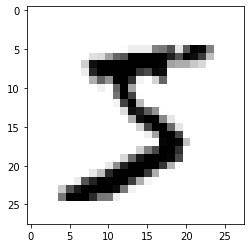

5


In [ ]:
# Loading the MNIST data set with samples and splitting it
mnist = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

plt.imshow(X_train[0], cmap = plt.cm.binary)
plt.show()
print(y_train[0])

modified_xtrain = X_train[0]

# Normalizing the data (making length = 1)
X_train = tf.keras.utils.normalize(X_train, axis=1)
X_test = tf.keras.utils.normalize(X_test, axis=1)

IMG_SIZE = 28

X_train = np.array(X_train).reshape(-1,IMG_SIZE, IMG_SIZE, 1)
X_test = np.array(X_test).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

In [ ]:
modified_xtrain.shape

(15, 15)

> <font size="5">Making the model</font>

In [ ]:
model = Sequential()

model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))



> <font size="5">Training and testing the model</font>



In [ ]:
model.fit(X_train, y_train, epochs=5, validation_split = 0.3)

# Evaluating the model
val_loss, val_acc = model.evaluate(X_test, y_test)
print("Loss:-", val_loss)
print("Accuracy:-", val_acc)



> <font size="5">Test using your own data</font>



Model 0 -> The number is probably a 5 66.88%
[[0.11718997 0.04137359 0.0221844  0.01496261 0.00133199 0.66883117
  0.00506605 0.0973016  0.00479187 0.02696688]]


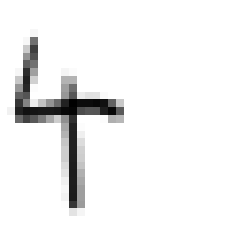

Error reading image! Proceeding with next image...
Model 0 -> The number is probably a 5 78.88%
[[1.2699867e-02 5.9525324e-03 1.7504307e-02 6.8550836e-03 6.1205274e-04
  7.8882992e-01 9.5717879e-03 1.1644496e-01 3.3374791e-04 4.1195672e-02]]


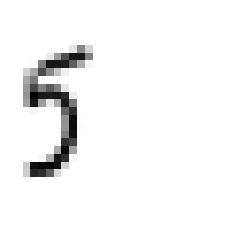

Error reading image! Proceeding with next image...
Model 0 -> The number is probably a 6 50.03%
[[4.3798861e-01 2.7724240e-02 1.0640225e-04 4.2883321e-03 4.7213846e-04
  2.1160001e-02 5.0026023e-01 4.9572496e-04 1.5327237e-03 5.9715747e-03]]


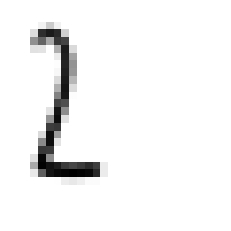

Error reading image! Proceeding with next image...
Model 0 -> The number is probably a 2 84.41%
[[1.0112185e-05 4.8255075e-02 8.4411746e-01 2.6874335e-02 1.9077017e-04
  7.4263844e-05 2.3256371e-07 3.8094951e-03 7.6540932e-02 1.2736120e-04]]


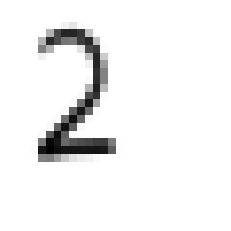

Error reading image! Proceeding with next image...


<Figure size 432x288 with 0 Axes>

In [ ]:
# Load custom images and predict them
# Use white background and black for image
IMG_SIZE = 28
image_number = 0

while os.path.isfile('/content/sample_data/Img/{}.png'.format(image_number)):
    try:
        img = cv2.imread('/content/sample_data/Img/{}.png'.format(image_number))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img = cv2.bitwise_not(img)
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE), interpolation = cv2.INTER_AREA)
        plt.imshow(img, cmap = plt.cm.binary)
        plt.axis(False)
        img = tf.keras.utils.normalize(img, axis = 1)
        img = np.array(img).reshape(-1,IMG_SIZE, IMG_SIZE, 1)
        
        prediction = model.predict(img)
        print("Model 0 -> The number is probably a {} {:.2f}%".format(np.argmax(prediction), np.max(prediction)*100))
        print(prediction)
        plt.show()
        
        fig = plt.figure()
        ax = fig.add_axes([0,1,1])
        ax.bar(range(10),round(prediction))
        plt.show()

        image_number += 1
    except:
        print("Error reading image! Proceeding with next image...")
        image_number += 1



> <font size="5">Save your model</font>



In [ ]:
model.save('handwritten_digits.model')



> <font size="5">Download your model (Google Colab)</font>



In [ ]:
!zip -r /content/file.zip /content/handwritten_digits.model
from google.colab import files
files.download("/content/file.zip")